# Vertical

[0.3370165745856354, 0.8, 0.4090909090909091, 0.3111111111111111]
[0.3351749539594844, 0.5333333333333333, 0.4090909090909091, 0.3111111111111111]
[0.3554327808471455, 0.26666666666666666, 0.5909090909090909, 0.22222222222222224]
[0.20810313075506448, 0.2, 0.22727272727272727, 0.08888888888888889]
[0.41068139963167594, 0.33333333333333337, 1.0, 1.0]
[0.7495395948434624, 1.0, 0.3181818181818181, 0.22222222222222224]
[1.0, 1.0, 0.5909090909090909, 0.4000000000000001]
[0.35, 0.5588235294117646, 0.47058823529411764, 0.2142857142857143]
[0.35, 0.47058823529411764, 0.47058823529411764, 0.2142857142857143]
[0.35, 0.2647058823529412, 0.7058823529411764, 0.3571428571428571]
[0.25, 0.2647058823529412, 0.23529411764705882, 0.11904761904761904]
[1.0, 0.29411764705882354, 1.0, 1.0]
[0.8, 0.5882352941176471, 0.47058823529411764, 0.2857142857142857]
[0.7, 1.0, 0.7647058823529412, 0.45238095238095233]
[0.2631578947368421, 0.26666666666666666, 1.0]
[0.2631578947368421, 0.26666666666666666, 0.8125]
[0.2

'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


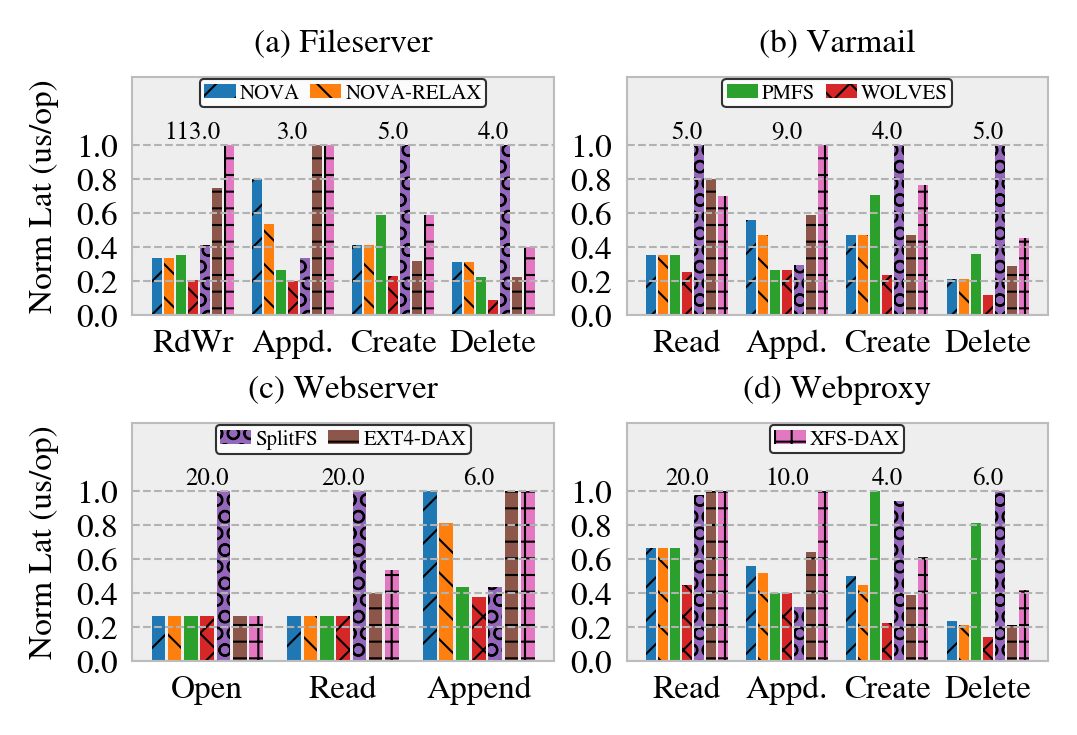

In [1]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import matplotlib.gridspec as gridspec


# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "y"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
plt.rcParams["hatch.color"] = "black"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("./performance-comparison-table-breakdown-fileserver", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(6)))
bar_width = 0.12
true_bar_width = 0.1
# subfig_titles = ["(a) Low Concurrency (1 thread)", "(b) High Concurrency (8 thread)"]
patterns = ['///', '\\\\\\', '', 'XXX', 'OOO', '---', '+++']
# Reference: https://designbro.com/blog/inspiration/color-combinations/
colors = ["#2b2d42", "#8d99ae", "#edf2f4", "#ef233c", "#ef233c", "#ef233c", "#ef233c", "#ef233c",]
cmap = "tab10"
fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']

workloads = ["./performance-comparison-table-breakdown-fileserver", "./performance-comparison-table-breakdown-varmail", "./performance-comparison-table-breakdown-webserver", "./performance-comparison-table-breakdown-webproxy"]
workloads_remap = ["(a) Fileserver", "(b) Varmail", "(c) Webserver", "(d) Webproxy"]
# times = ["open", "append", "create", "delete"]
# times_remap = ["Open", "Append", "Create", "Delete"]
num_thread = 1
# workloads_name_remap = ["Fileserver", "Varmail", "Webserver", "Webproxy", "Fileserver-8", "Varmail-8", "Webserver-8", "Webproxy-8"]
tot = len(fss) * bar_width
bars = []


# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("./performance-comparison-table-breakdown-fileserver", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

for workload_idx, workload in enumerate(workloads):
    
    with open(workload, "r") as f:
        df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
    
    times = [ "read", "append", "create", "delete"]
    
    if workload_idx == 0:
        times = [ "IO", "append", "create", "delete"]
        times_remap = ["RdWr", "Appd.", "Create", "Delete"]
    
    if workload_idx == 1:
        times_remap = ["Read", "Appd.", "Create", "Delete"]

    if workload_idx == 2:
        times = ["open", "read", "append"]
        times_remap = ["Open", "Read", "Append"]
    
    if workload_idx == 3:
        times_remap = ["Read", "Appd.", "Create", "Delete"]

    x = list(range(1, len(times) + 1))
    subfig = plt.subplot(2, 2, workload_idx + 1)
    # Normalize
    max_times = []
    killer_times = []
    for time_idx, time in enumerate(times):
        # df[(df['threads'] == 1)][time] = df[(df['threads'] == 1)][time] / df[time].max()
        # print(df[(df['threads'] == 1)][time])
        max_times.append(df[(df['threads'] == num_thread)][time].max())
        killer_times.append(df[(df['file_system'] == "KILLER") & (df['threads'] == num_thread)][time].iloc[0])
        df.loc[(df['threads'] == num_thread), time] = df[(df['threads'] == num_thread)][time] / df[(df['threads'] == num_thread)][time].max()

    for idx, fs in enumerate(fss):
        points = []
        for pivot in x:
            point = pivot - tot / 2 + bar_width / 2 + idx * bar_width
            points.append(point)
        bws = []
        for time_idx, time in enumerate(times):
            if df[(df['file_system'] == fs) & (df['threads'] == num_thread)][time].iloc[0] == 0:
                bws.append(0.01)
            else:
                bws.append(df[(df['file_system'] == fs) & (df['threads'] == num_thread)][time].iloc[0])
        print(bws)
        # print(bws)
        # for fig_idx in range(0, len(num_threads)):
        #     for workload in workloads:
        #         bws.append(df[(df['file_system'] == fs) & (df['file_bench'] == workload) & (df['threads'] == num_threads[fig_idx])]['iops'].iloc[0])
        bar = plt.bar(points, bws, width=true_bar_width, hatch=patterns[idx], color=plt.get_cmap(cmap)(idx), linewidth=0.5)
        # draw max time on top of bar
        if fs == "KILLER":
            for point_idx, pivot in enumerate(x):
                plt.text(pivot, 1, "{:.1f}".format(killer_times[point_idx] * 1000), fontsize=6, ha='center', va='bottom')

        bars.append(bar)
        ax = fig.gca()
        lw = 0.5
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(lw)

        plt.tick_params(bottom=False, top=False, left=False, right=False)
        # Draw title
        plt.xticks(x, labels=times_remap, fontsize=8)
        plt.ylim((0, 1.4))
        plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=8)
        if workload_idx == 0 or workload_idx == 2:
            plt.ylabel('Norm Lat (us/op)', fontsize=8)
        # plt.xlabel(subfig_titles[fig_idx], fontsize=8)
        plt.title(workloads_remap[workload_idx], fontsize=8)
    
legend_labels = fss
legend_labels = legend_labels.replace("SplitFS-FILEBENCH", "SplitFS")
legend_labels = legend_labels.replace("KILLER", "WOLVES")
steps = [2, 2, 2, 2]
for ax_id, ax in enumerate(fig.axes):
    start = sum(steps[:ax_id])
    end = start + steps[ax_id]

    leg = ax.legend(bars[start : end], legend_labels[start : end], loc='upper center', bbox_to_anchor=(0,0,1,1), bbox_transform=ax.transAxes, ncol=2, fontsize=5, frameon=True, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5, labelspacing=0.1, borderpad=0.2)
    
    frame = leg.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')
    
# fig.legend(bars, legend_labels, loc='center', bbox_to_anchor=(0.5, 1.05), ncol=3, fontsize=8, frameon=False)
# fig.legend(legend_labels, loc='center', bbox_to_anchor=(0.5, 1.01), ncol=4, fontsize=8, frameon=False, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5)
plt.tight_layout(pad=0.4)
plt.savefig("./FIG-MacroBreakdown-VERTICAL.pdf", bbox_inches='tight', pad_inches=0)
plt.show()